# Everything Else

In [1]:
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
from matplotlib.patches import Ellipse
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap
# from mpl_toolkits.axes_grid1 import make_axes_locatable 
# from matplotlib.ticker import MultipleLocator

# astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord
# from astropy.coordinates import Angle
import astropy.units as u
from astropy.wcs import WCS
# from astropy.table import Table

import seaborn as sns

# import random

# import pandas as pd

# Functions
from FITS_Image_Functions import *
from C29_functions import *

In [2]:
# Font sizes
title_fs = 25
axis_label_fs = 20
axis_num_fs = 20
legend_title_fs = 20
legend_text_fs = 15
cbar_fs = 20
text_fs = 28

In [4]:
distance_pc = 132

In [5]:
folder_path = "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/"

In [6]:
# Define the path to the Stokes I FITS file
StokesI_file = folder_path + "c2d_989_StokesI_233GHz.fits"

# Open the FITS file and create an HDU (Header/Data Unit) list
StokesI_hdu_list = fits.open(StokesI_file, memmap=True)

# Extract the header 
StokesI_header = StokesI_hdu_list[0].header

# Extract the data 
StokesI_data = StokesI_hdu_list[0].data

In [7]:
StokesI_wcs = WCS(naxis=2)

StokesI_wcs.wcs.ctype=[StokesI_header['CTYPE1'],StokesI_header['CTYPE2']]
StokesI_wcs.wcs.crpix=[StokesI_header['CRPIX1'],StokesI_header['CRPIX2']]
StokesI_wcs.wcs.crval=[StokesI_header['CRVAL1'],StokesI_header['CRVAL2']]
StokesI_wcs.wcs.cdelt=[StokesI_header['CDELT1'],StokesI_header['CDELT2']]

In [8]:
StokesI_data_2d = StokesI_data[0,0,:,:]

In [9]:
StokesI_data_2d_mJy = StokesI_data_2d * 1000

In [18]:
vmin_nonan = np.nanmin(StokesI_data_2d_mJy)
vmax_nonan = np.nanmax(StokesI_data_2d_mJy)

print(f"vmin_nonan: {vmin_nonan:.2f}")
print(f"vmax_nonan: {vmax_nonan:.2f}")

vmin_nonan: -1.82
vmax_nonan: 90.76


In [55]:
vmin_custom = -0.2
vmax_custom = 89.85

print(f"vmin_custom: {vmin_custom:.2f}")
print(f"vmax_custom: {vmax_custom:.2f}")

vmin_custom: -0.20
vmax_custom: 89.85


In [56]:
# vmin = vmin_nonan
# vmax = vmax_nonan


vmin = vmin_custom
vmax = vmax_custom

print(f"vmin: {vmin:.2f}")
print(f"vmax: {vmax:.2f}")

vmin: -0.20
vmax: 89.85


## Stretch Function

In [57]:
def log_stretch(data, base=100, vmin=None, vmax=None):
    """
    Apply a logarithmic stretch to data with a specified base.

    Parameters:
    data (numpy.ndarray): The input data array.
    base (float): The base of the logarithm. Default is 100.
    vmin (float): Minimum value for stretching. If None, data minimum is used.
    vmax (float): Maximum value for stretching. If None, data maximum is used.

    Returns:
    numpy.ndarray: The transformed data with log stretch applied.
    """
    # Set default vmin and vmax if not specified
    if vmin is None:
        vmin = np.nanmin(data)
    if vmax is None:
        vmax = np.nanmax(data)
    
    # Normalize the data between 0 and 1
    normalized_data = (data - vmin) / (vmax - vmin)
    
    # Apply the log stretch using log base 100
    log_stretched_data = np.log(normalized_data * (base - 1) + 1) / np.log(base)
    
    return log_stretched_data

In [58]:
def recover_original_value(stretched_value, vmin, vmax, base=100):
    """
    Recover the original value from a log-stretched value.

    Parameters:
    stretched_value (float): The value from the log-stretched data (between 0 and 1).
    vmin (float): The minimum value of the original data.
    vmax (float): The maximum value of the original data.
    base (float): The base of the logarithm used for stretching. Default is 100.

    Returns:
    float: The corresponding original value before the stretch.
    """
    # Reverse the log stretch to get the normalized value
    normalized_data = (base**stretched_value - 1) / (base - 1)
    
    # Map the normalized value back to the original value range
    original_value = vmin + normalized_data * (vmax - vmin)
    
    return original_value


# Plot

In [60]:
data_clipped = np.clip(StokesI_data_2d_mJy, vmin, vmax)

In [61]:
# Apply the log stretch (base 100) to the data
StokesI_data_stretched = log_stretch(data_clipped, base=100, vmin = vmin, vmax = vmax)

In [62]:
cbar_ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])

# Get original values for the color bar ticks
original_values = recover_original_value(cbar_ticks, vmin, vmax)
original_values

array([-0.2       ,  1.17520579,  4.62956655, 13.30652848, 35.10207142,
       89.85      ])

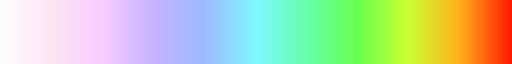

In [99]:
# Hex codes for the colors
hex_colors = [
    "#fefefe",  # White
    "#fde5f3",  # Light Pink
    "#f8ccff",  # Light Purple
    "#c5b3fd",  # Soft Purple
    "#9cbaff",  # Light Blue
    "#80f7ff",  # Pastel Cyan
    "#66ffaa",  # Lime Green
    "#6aff4e",  # Bright Green
    "#ccff32",  # Lime Yellow
    "#ffaf1b",  # Soft Orange
    "#ff1900",  # Red
]

# Convert hex codes to RGB values (normalized to 0-1)
rgb_colors = [
    tuple(int(color[i:i+2], 16) / 255 for i in (1, 3, 5)) for color in hex_colors
]

# Create the colormap using the pastel colors and divide it into 1000 steps
soft_colormap = LinearSegmentedColormap.from_list("SoftColorMap", rgb_colors, N=1000)
soft_colormap

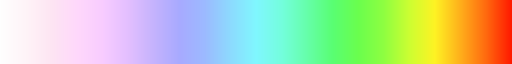

In [109]:
# Hex codes for the colors
hex_colors = [
    "#fefefe",  # White
    "#fff4f8",  # Very Light Pink
    "#fde5f3",  # Light Pink
    "#ffd8fb",  # Light Lavender
    "#f8ccff",  # Light Purple
    "#e3bfff",  # Light Lilac
    "#c5b3fd",  # Soft Purple
    "#a8aaff",  # Soft Blue
    "#9cbaff",  # Light Blue
    "#8ddafe",  # Sky Blue
    "#80f7ff",  # Pastel Cyan
    "#74fedd",  # Light Turquoise
    "#66ffaa",  # Lime Green
    "#59fe73",  # Light Green
    "#6aff4e",  # Bright Green
    "#8efe41",  # Lime Yellow
    "#ccff32",  # Bright Lime Yellow
    "#fef324",  # Soft Yellow
    "#ffaf1b",  # Soft Orange
    "#ff6a0f",  # Bright Orange
    "#ff1900",  # Red
]

# Convert hex codes to RGB values (normalized to 0-1)
rgb_colors = [
    tuple(int(color[i:i+2], 16) / 255 for i in (1, 3, 5)) for color in hex_colors
]

# Create the colormap using the pastel colors and divide it into 1000 steps
soft_colormap_v2 = LinearSegmentedColormap.from_list("SoftColorMapV2", rgb_colors, N=100000)
soft_colormap_v2

In [110]:
cmap = soft_colormap_v2
alpha = 1

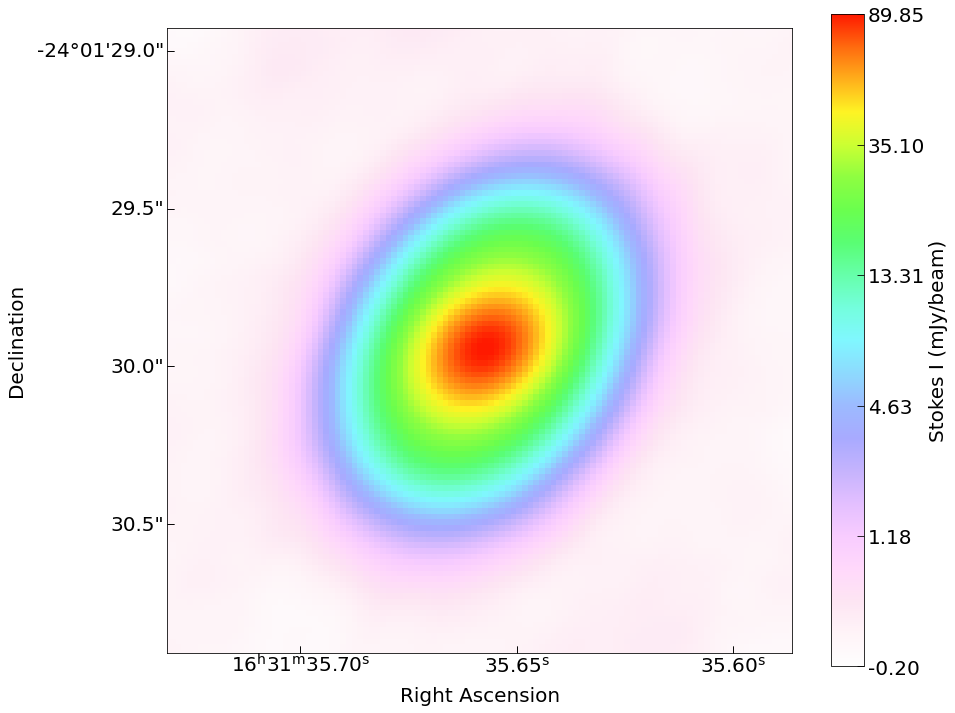

In [111]:
# Create a figure with the WCS projection
fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': StokesI_wcs})


# Add data (log stretched)
im = ax.imshow(StokesI_data_stretched, cmap=cmap, alpha = alpha)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'Stokes I (mJy/beam)', fontsize=cbar_fs)
cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
cbar.ax.tick_params(which='minor', length=4, direction="in")

# Update colorbar ticks and labels
cbar.set_ticks(cbar_ticks)  # Set tick locations in stretched space
cbar.set_ticklabels([f"{val:.2f}" for val in original_values])

# Add title and axis labels
ax.set_xlabel('Right Ascension', fontsize=axis_label_fs)
ax.set_ylabel('Declination', fontsize=axis_label_fs)

# Set x and y limits
centre_x = 857
centre_y = 828
half_num_pixels = 55
xmin = centre_x - half_num_pixels
xmax = centre_x + half_num_pixels
ymin = centre_y - half_num_pixels
ymax = centre_y + half_num_pixels
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


# Adjust ticks and numbers
ax.minorticks_on()
ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=False, length=7, labelsize=axis_num_fs)
ax.tick_params(axis="y", which="major", direction="in", left=True, right=False, length=7, labelsize=axis_num_fs)

# Show the plot
plt.show()